In [2]:
import numpy as np

In [3]:
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((6*8, 3), np.float32)
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)

print(np.mgrid[0:8, 0:6])
print(np.mgrid[0:8, 0:6].shape)
print(np.mgrid[0:8, 0:6].T)
print(np.mgrid[0:8, 0:6].T.shape)

print(objp[:, 2:3])
print(objp.shape)

[[[0 0 0 0 0 0]
  [1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]
  [7 7 7 7 7 7]]

 [[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]]
(2, 8, 6)
[[[0 0]
  [1 0]
  [2 0]
  [3 0]
  [4 0]
  [5 0]
  [6 0]
  [7 0]]

 [[0 1]
  [1 1]
  [2 1]
  [3 1]
  [4 1]
  [5 1]
  [6 1]
  [7 1]]

 [[0 2]
  [1 2]
  [2 2]
  [3 2]
  [4 2]
  [5 2]
  [6 2]
  [7 2]]

 [[0 3]
  [1 3]
  [2 3]
  [3 3]
  [4 3]
  [5 3]
  [6 3]
  [7 3]]

 [[0 4]
  [1 4]
  [2 4]
  [3 4]
  [4 4]
  [5 4]
  [6 4]
  [7 4]]

 [[0 5]
  [1 5]
  [2 5]
  [3 5]
  [4 5]
  [5 5]
  [6 5]
  [7 5]]]
(6, 8, 2)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(48, 3)


In [15]:
a = np.array([1, 2, 3])
a[::-1]

array([3, 2, 1])

(48, 1, 2)
[[436.50708  114.335556]] [[1103.9984   224.66327]]


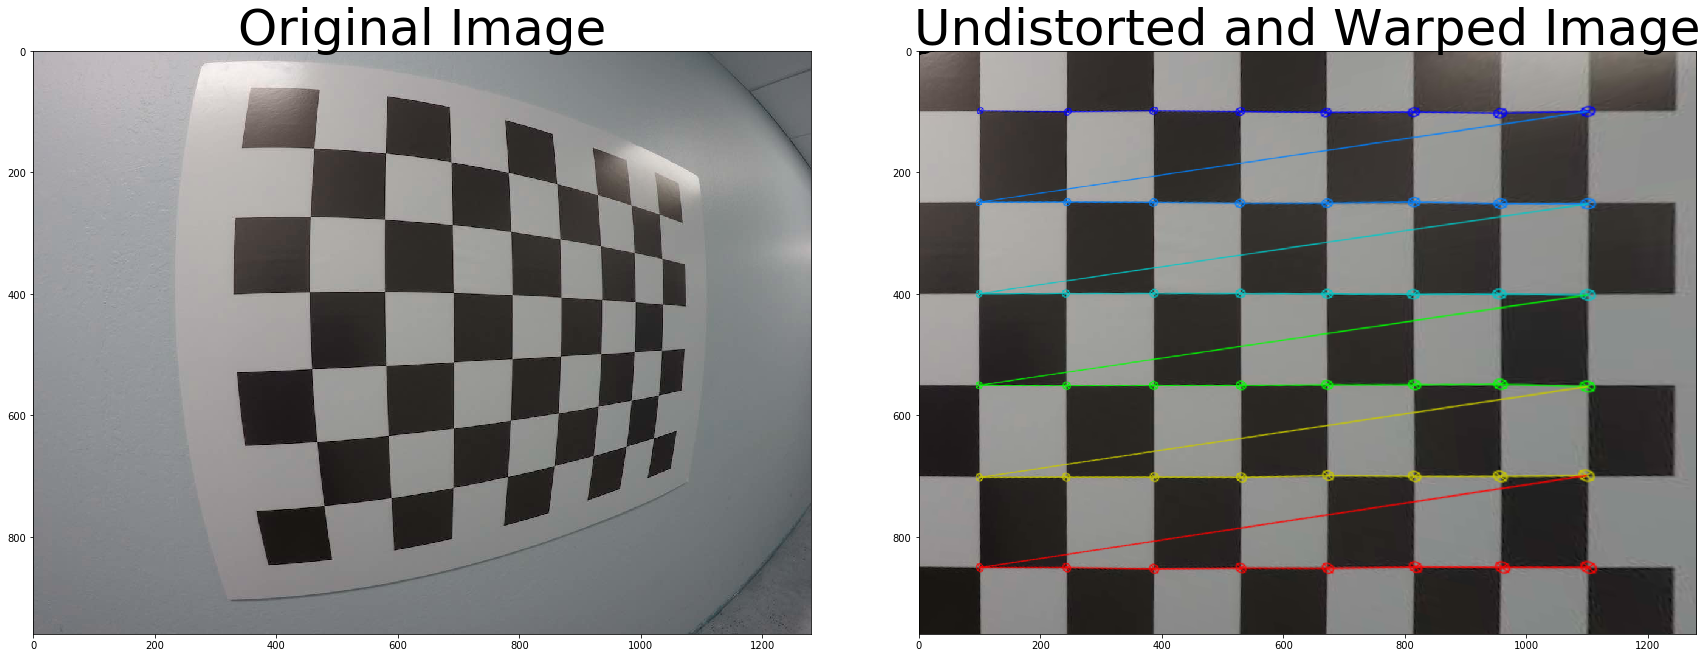

In [20]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img = cv2.undistort(img, mtx, dist, None, mtx)
    
    # 2) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    print(corners.shape)
    print(corners[0], corners[nx-1])
    
    src = np.float32([
        [436.50708, 114.335556],
        [1103.9984, 224.66327],
        [1075.5115, 658.0274],
        [465.32727, 768.5894]
    ])
    
    dst = np.float32([
        [100.0, 100.0,],
        [1100.0, 100.0],
        [1100.0, 850.0],
        [100.0, 850.0]
    ])
    
    
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)

    # 4) If corners found: 
    
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
